In [19]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout

#stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
#stock_data.head()

In [2]:
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041485,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439022,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980330,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010454,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126839,283192000


Text(0, 0.5, 'Prices ($)')

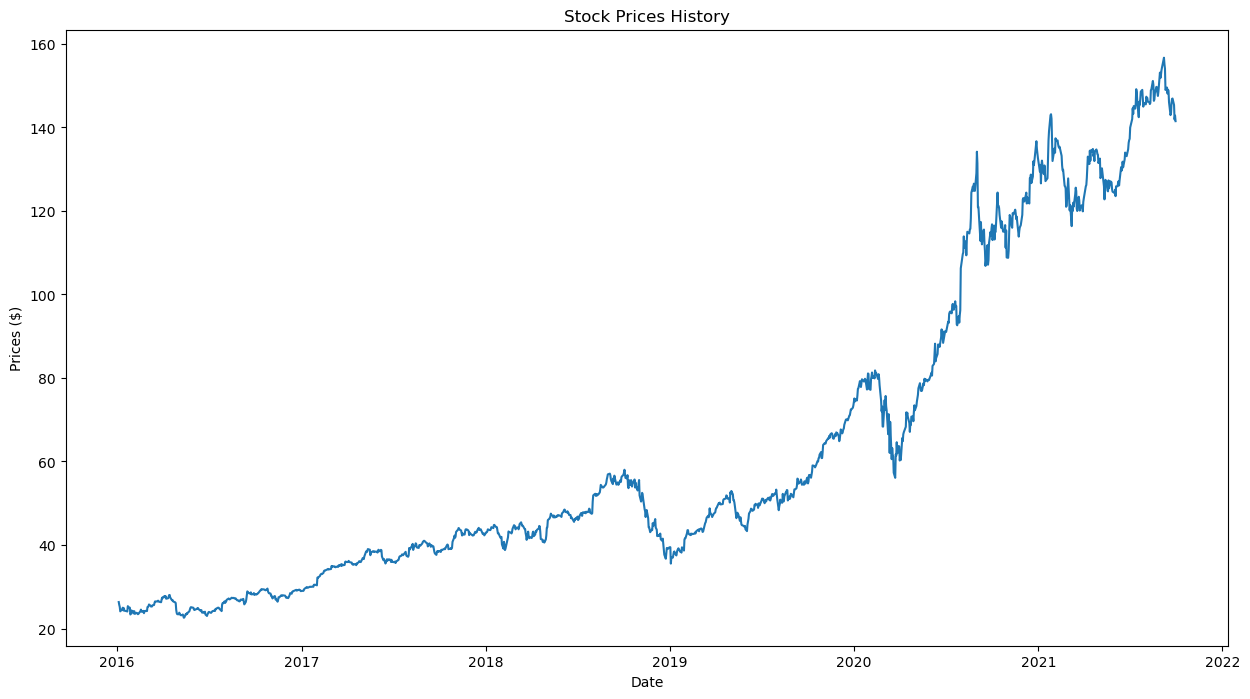

In [3]:

plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [4]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [5]:

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=5)


Epoch 1/5
1098/1098 [==============================] - 21s 17ms/step - loss: 7.9320e-04
Epoch 2/5
1098/1098 [==============================] - 20s 18ms/step - loss: 4.7546e-04
Epoch 3/5
1098/1098 [==============================] - 22s 20ms/step - loss: 2.5376e-04
Epoch 4/5
1098/1098 [==============================] - 26s 24ms/step - loss: 2.5378e-04
Epoch 5/5
1098/1098 [==============================] - 21s 19ms/step - loss: 2.1321e-04


In [12]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 22ms/step


6.0014897118802715

C:\Users\yotam\AppData\Local\Temp\ipykernel_25112\2750358509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


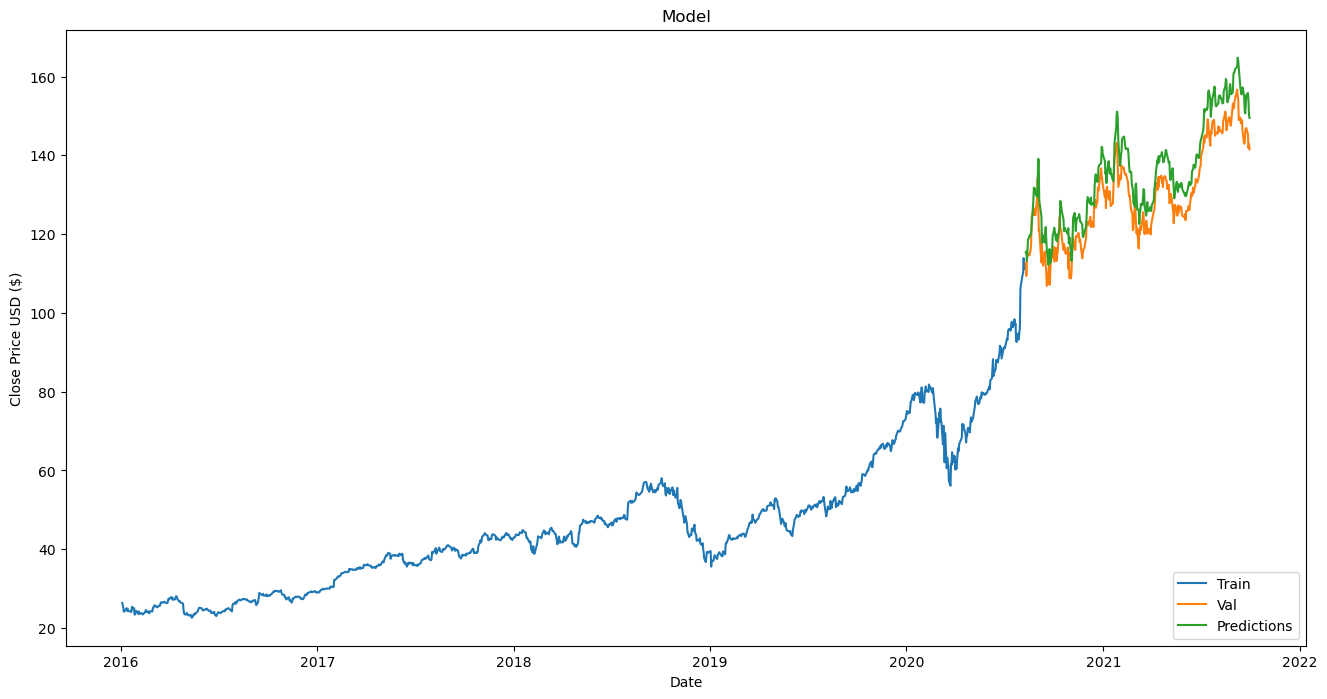

In [13]:

data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
model2 = keras.Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(layers.Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 8s 65ms/step - loss: 0.0067
Epoch 2/100
35/35 [==============================] - 2s 68ms/step - loss: 0.0014
Epoch 3/100
35/35 [==============================] - 2s 70ms/step - loss: 0.0014
Epoch 4/100
35/35 [==============================] - 2s 69ms/step - loss: 0.0011
Epoch 5/100
35/35 [==============================] - 2s 68ms/step - loss: 9.5688e-04
Epoch 6/100
35/35 [==============================] - 2s 69ms/step - loss: 9.5595e-04
Epoch 7/100
35/35 [==============================] - 3s 72ms/step - loss: 8.7475e-04
Epoch 8/100
35/35 [==============================] - 2s 70ms/step - loss: 0.0010
Epoch 9/100
35/35 [==============================] - 2s 70ms/step - loss: 8.4106e-04
Epoch 10/100
35/35 [==============================] - 3s 72ms/step - loss: 8.6312e-04
Epoch 11/100
35/35 [==============================] - 3s 72ms/step - loss: 7.1252e-04
Epoch 12/100
35/35 [==============================] - 3s 72ms/step - loss: 8.8565e-

35/35 [==============================] - 3s 74ms/step - loss: 3.7892e-04
Epoch 97/100
35/35 [==============================] - 3s 73ms/step - loss: 3.1149e-04
Epoch 98/100
35/35 [==============================] - 3s 74ms/step - loss: 4.0280e-04
Epoch 99/100
35/35 [==============================] - 3s 73ms/step - loss: 3.5498e-04
Epoch 100/100
35/35 [==============================] - 3s 74ms/step - loss: 3.8450e-04


In [21]:

predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 2s 32ms/step


1.0593125762411468

C:\Users\yotam\AppData\Local\Temp\ipykernel_25112\2750358509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


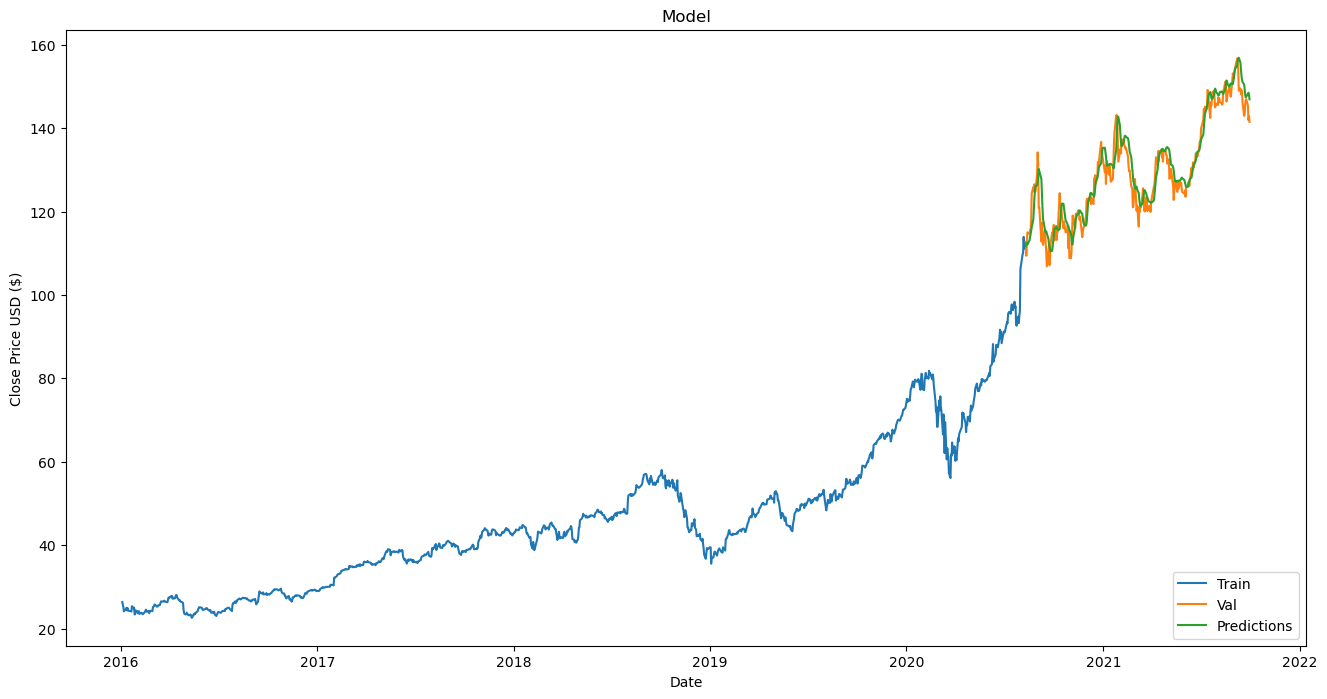

In [22]:

data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
pip install tensorflow

In [ ]:
pip install yfinance